# 1.1: Bikeshare I (A Basic Model)

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

In [1]:
''' 
***You can read this section if you are interested
in how Python works, but it is not crucial to our work***

For many of the chapters, we will want to import ready-made
functions.  Some of these are functions that we have
created.  These 'homemade functions' are stored in files 
called modsim.py and chap0x.py, which are found in 
Notebooks/ModSimPy_Functions.

Other imported functions are imported from standard
libraries of functions, such as 'pandas,' which is a well-known
data analysis library.

The code here checks to see if those files exist,
and if not, it creates a 'ModSimPy_Functions' folder,
and downloads the requested files from my github account.

Once the files are there, the "import" line
pulls a set of ready-made functions into the notebook
so that they can be used whenever necessary
To look at these functions, feel free to open
Notebooks/ModSimPy_functions/modsim.py 
'''


# This section defines a function that downloads any 
# missing ModSimPy files
from os.path import basename, exists
from os import mkdir

def download(url,folder):
    filename = folder + basename(url)
    if not exists(folder):
        mkdir(folder)
    # fetches the file at the given url if it is not already present
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

# This line runs the 'download' function that is defined above,
# and provides the url address from which the file should be
# downloaded.
download('https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/ModSimPy_Functions/'
     + 'modsim.py', 'ModSimPy_Functions/')

# Now that we know the file is where it should be, we can
# import the file.  The asterisk (*) tells the program to import
# all of the functions from that file
from ModSimPy_Functions.modsim import *

# Now we'll import the standard 'pandas' library and give it a nickname
import pandas as pd

### Modeling Basics

Most models attempt to describe some system that changes over time.  How does the population grow? When will the company start to make a profit? How does the rocket re-enter the atmosphere?  What happens when we put a bunch of 18-wheelers on the bridge?  

All of these processes consist of two parts:

1) An initial state (the current population, the company's current financial situation, the rocket in space, etc...).      

2) A process of change over time.  

Any model will need to define both of these parts.  The initial state is defined by a set of values.  Values that don't change are called *parameters* (e.g. the density of the steel in the bridge, or the mass of the rocket).  Values that do change are called *variables* (e.g. the number of 18-wheelers on the bridge, or the elevation of the rocket).

The process of change is defined by a rule, or a set of rules, about how this change occurs.  We will call these rules a *change function*.  Much of this class will be spent exploring different types of change functions (if you look at the schedule on the syllabus, you'll see that the units are defined largely by types of change functions).  These rules might stay the same the whole time, or they might change, gradually or suddenly.  The rules might create random *stochastic* changes, or established *deterministic* changes.

The change occurs through *time steps*.  Each time step represents a certain amount of time, and each step represents a change in the variables of the system: these variables are collectively called the *state* of the system.

In this chapter, we'll begin to create our first full-fledged model.  In order to do that, we will need to define an initial state and a change function.

## Modeling a Bike Share System

Imagine a bike share system for students traveling between Augie and downtown Moline.

Suppose the system contains 12 bikes and two bike racks, one at Augie and one at Moline, each with the capacity to hold 12 bikes.  This is our initial state.

As students arrive, check out a bike, and ride to the other campus, the number of bikes in each location changes. In the simulation, we'll need to keep track of where the bikes are--that is, we'll need to keep track of the *state* of the system. 

To do that, we'll use an `object` called a `Series`, which is part of a `Library` of code called Pandas.  A couple definitions:

- An `object` is a catch-all term for a "thing" in python: a collection of data of any sort.

- A `Series` is an object that holds a set of variable values in a table-like form: it's a particular kind of `object`.  We'll see an example of this in action in just a moment.

- A `Library` is a set of pre-written code that we can access in our own programs.  You can "check out" this pre-written code by "importing" it into your code.

We'll start by importing the Pandas library (which is a data analysis library), and creating a `Series` called `bikeshare`.  This will be our *state object*: it will hold information about the state of our system.

In [2]:
import pandas as pd

bikeshare = pd.Series(dict(augie=10,moline=2),name='Number of Bikes')
bikeshare


augie     10
moline     2
Name: Number of Bikes, dtype: int64

Notice the format here (We'll use a lot of cut-and-paste in our programming, so you don't need to memorize this stuff.  But you do want to start paying attention to the format):

- The first line imports the library, and gives it the shorthand `pd`.  Importing the library makes all of its objects and methods available to the program, and the shorthand version slims down the code a bit.

- The second line creates the `Series` and calls it `bikeshare`.  
--The first expression creates a foundational Python object called a `dictionary`, which is a set of label-value pairs. This dictionary contains the data for our `Series`. Notice that each `value` has a `label` (the value '10', for instance, has the label 'Augie').  `name` is a *keyword argument* that describes the meaning of our values: '2' and '10' represent the number of bikes at the two locations.  

Together, two variables represent the *state variables*.  The *initial state* indicates that there are 10 bikes at Augie and 2 at Moline. 

We can read the variables inside a `Series` using the *dot operator*, like this:

In [3]:
bikeshare.augie

10

And this:

In [4]:
bikeshare.moline

2

Or, to display the state variables and their values, you can just enter the name of the object:

In [5]:
bikeshare

augie     10
moline     2
Name: Number of Bikes, dtype: int64

These values make up the *state* of the system.

We can represent our `Series` in a way that looks more like a table by transforming the `Series` into another Pandas object called a `DataFrame` (we'll get to those later: we're just using it as a display tool here):

In [6]:
pd.DataFrame(bikeshare)

,Number of Bikes
augie,10
moline,2


You don't have to use this format, but I think the results look better, and it provides a better visual sense of the nature of a `Series`.

We can update the state by assigning new values to the variables. 
For example, if a student moves a bike from Augie to Moline, we can figure out the new values and assign them:

In [7]:
# First simple change function
bikeshare.augie = 9
bikeshare.moline = 3
pd.DataFrame(bikeshare)

,Number of Bikes
augie,9
moline,3


Or we can use *update operators*, `-=` and `+=`, to subtract 1 from
`augie` and add 1 to `moline`:

In [8]:
# Second simple change function
bikeshare.augie -= 1
bikeshare.moline += 1
pd.DataFrame(bikeshare)

,Number of Bikes
augie,8
moline,4


Try running the last cell again.  What happens to the state of the system?  Now run the cell with the "first simple change function" again.

Each time you run the cell, it performs the action described by the code, even if you had already run that cell before.

## Defining Functions

So far we have used functions defined in NumPy and the ModSim library. Now we're going to define our own functions.

When you are developing code in Jupyter, it is often efficient to write a few lines of code, test them to confirm they do what you intend, and then use them to define a new function. For example, these lines move a bike from Augie to Moline:

In [9]:
bikeshare.augie -= 1
bikeshare.moline += 1

Rather than repeat them every time a bike moves, we can define a new
function:

In [10]:
def bike_to_moline():
    bikeshare.augie -= 1
    bikeshare.moline += 1

`def` is a special word in Python that indicates we are defining a new
function. The name of the function is `bike_to_moline`. The empty
parentheses indicate that this function requires no additional
information when it runs. The colon indicates the beginning of an
indented *code block*.

The next two lines are the *body* of the function. They have to be
indented; by convention, the indentation is four spaces.

When you define a function, it has no immediate effect. The body of the
function doesn't run until you *call* the function. Here's how to call
this function:

In [11]:
bike_to_moline()

When you call the function, it runs the statements in the body, which
update the variables of the `bikeshare` object; you can check by
displaying the new state.

In [12]:
pd.DataFrame(bikeshare)

,Number of Bikes
augie,6
moline,6


When you call a function, you have to include the parentheses. If you
leave them out, you get this:

In [13]:
bike_to_moline

<function __main__.bike_to_moline()>

This result indicates that `bike_to_moline` is a function. You don't have to know what `__main__` means, but if you see something like this, it probably means that you named a function but didn't actually call it.
So don't forget the parentheses.

## Print Statements

As you write more complicated programs, it is easy to lose track of what
is going on. One of the most useful tools for debugging is the *print statement*, which displays text in the Jupyter notebook.

Normally when Jupyter runs the code in a cell, it displays the value of
the last line of code. For example, if you run:

In [14]:
bikeshare.augie
bikeshare.moline

6

Jupyter runs both lines, but it only displays the value of the
second. If you want to display more than one value, you can use
print statements:

In [15]:
print(bikeshare.augie)
print(bikeshare.moline)

6
6


When you call the `print` function, you can put a variable in
parentheses, as in the previous example, or you can provide a sequence
of variables separated by commas, like this:

In [16]:
print("There are", bikeshare.augie,"bikes at Augustana, and", 
      bikeshare.moline, "bikes in Moline.")

There are 6 bikes at Augustana, and 6 bikes in Moline.


Python looks up the values of the variables and displays them. Notice that when you put letters or numbers inside quotation marks, the letters/ numbers are not treated as variables or numerical values.  These quotation marked `objects` are called `strings`.

Print statements are useful for debugging functions. For example, we can
add a print statement to `move_bike`, like this:

In [17]:
def bike_to_moline():
    print('Moving a bike to Moline')
    bikeshare.augie -= 1
    bikeshare.moline += 1

Each time we call this version of the function, it displays a message,
which can help us keep track of what the program is doing.
The message in this example is a *string*, which is a sequence of
letters and other symbols in quotes.

Just like `bike_to_moline`, we can define a function that moves a
bike from Moline to Augustana:

In [18]:
def bike_to_augie():
    print('Moving a bike to Augustana')
    bikeshare.moline -= 1
    bikeshare.augie += 1

And call it like this:

In [19]:
bike_to_augie()

pd.DataFrame(bikeshare)

Moving a bike to Augustana


,Number of Bikes
augie,7
moline,5


One benefit of defining functions is that you avoid repeating chunks of
code, which makes programs smaller. Another benefit is that the name you
give the function documents what it does, which makes programs more
readable.

## If Statements

At this point we have functions that simulate moving bikes; now let's think about simulating customers. As a simple model of customer behavior, I will use a random number generator to determine when customers arrive at each station.

The ModSim library provides a function called `flip` that generates random "coin tosses".
When you call it, you provide a probability between 0 and 1, like this:

In [20]:
flip(0.7)

True

The result is one of two values: `True` with probability 0.7 (in this example) or `False`
with probability 0.3. If you run `flip` like this 100 times, you should
get `True` about 70 times and `False` about 30 times. But the results
are random, so they might differ from these expectations.

`True` and `False` are special values defined by Python. 
They are called *boolean* values because they are
related to Boolean algebra (<https://modsimpy.com/boolean>).

Note that they are not strings. There is a difference between `True`, which is a boolean value, and `'True'`, which is a string.

We can use boolean values to control the behavior of the program, using an *if statement*:

In [21]:
if flip(0.5):
    print('heads')

If the result from `flip` is `True`, the program displays the string
`'heads'`. Otherwise it does nothing.

The syntax for `if` statements is similar to the syntax for
function definitions: the first line has to end with a colon, and the
lines inside the `if` statement have to be indented.

Optionally, you can add an *else clause* to indicate what should
happen if the result is `False`:

In [22]:
if flip(0.5):
    print('heads')
else:
    print('tails')    

tails


If you run the previous cell a few times, it should print `heads` about half the time, and `tails` about half the time.

Now we can use `flip` to simulate the arrival of customers who want to
borrow a bike. Suppose students arrive at the augie station every two
minutes on average.
In that case, the chance of an arrival during any one-minute period is 50%, and we can simulate it like this:

In [23]:
if flip(0.5):
    bike_to_moline()

Moving a bike to Moline


If students arrive at the moline station every three minutes, on average,
the chance of an arrival during any one-minute period is 33%, and we can
simulate it like this:

In [24]:
if flip(0.33):
    bike_to_augie()

We can combine these snippets into a function that simulates a *time step*, which is an interval of time, in this case one minute:

In [25]:
# A more interesting change function
def change_func():
    if flip(0.5):
        bike_to_moline()
    
    if flip(0.33):
        bike_to_augie()

Then we can simulate a time step like this:

In [26]:
change_func()

pd.DataFrame(bikeshare)

Moving a bike to Augustana


,Number of Bikes
augie,7
moline,5


Depending on the results from `flip`, this function might move a bike to augie, or to moline, or neither, or both.  Run change_func multiple times (by clicking 'shift-enter' in the box above) and note how the state of the system changes.

`change_func` is our first fully-formed change function!  We can run this function *n* number of times, and it will simulate the changes in the state of the system over a period of *n* minutes.

## Parameters

The previous version of `change_func` is fine if the arrival probabilities
never change, but in reality they vary over time.

So instead of putting the constant values 0.5 and 0.33 in `step`, we can replace them with *parameters*.
Parameters are variables whose values are set when a function is called.

Here's a version of `change_func` that takes two parameters, `p1` and `p2`:

In [27]:
def change_func(p1, p2):
    if flip(p1):
        bike_to_moline()
    
    if flip(p2):
        bike_to_augie()

The values of `p1` and `p2` are not set inside this function; instead,
they are provided when the function is called, like this:

In [28]:
change_func(0.5, 0.33)

The values you provide when you call the function are called
*arguments*. The arguments, `0.5` and `0.33` in this example, get
assigned to the parameters, `p1` and `p2`, in order. So running this
function has the same effect as:

In [29]:
p1 = 0.5
p2 = 0.33

if flip(p1):
    bike_to_moline()
    
if flip(p2):
    bike_to_augie()

The advantage of using parameters is that you can call the same function many times, providing different arguments each time.

Adding parameters to a function is called *generalization*, because it makes the function more general; without parameters, the function always does the same thing; with parameters, it can do a range of things.

## For Loops

At some point you will get sick of running cells over and over.
Fortunately, there is an easy way to repeat a chunk of code, the *for loop*. Here's an example:

In [30]:
for i in range(3):
    print(i)
    bike_to_moline()

0
Moving a bike to Moline
1
Moving a bike to Moline
2
Moving a bike to Moline


The syntax here should look familiar; the first line ends with a
colon, and the lines inside the `for` loop are indented. The other
elements of the loop are:

-   The words `for` and `in` are special words we have to use in a for
    loop.

-   `range` is a Python function we use to control the number of times the loop runs.

-   `i` is a *loop variable* that gets created when the for loop runs.

When this loop runs, it runs the statements inside the loop three times.  The first time, the value of `i` is `0`; the second time, it is `1`; the third time, it is `2`.

Each time through the loop, it prints the value of `i` and moves one bike to Moline.

## Using a Series to record change

When we run a simulation, we often want to save the results for later analysis. We can save those results in a `Series`.

In this case, the labels are integers representing minutes; from now on, we'll call the collection of labels in a `Series` the `index`. The variables, or `values`, in this case are the number of bikes at *one* location.

Since we have moved a number of bikes around, let's start again with a new state object.  When you run this cell, it overwrites any previously existing values for `bikeshare`.

In [31]:
bikeshare = pd.Series(dict(augie=10,moline=2),name="Number of Bikes")

We can create a new, empty `Series` to keep track of our results.:

In [32]:
results = pd.Series([],dtype=object)
results.name='Number of Bikes at Augie'
results.index.name = 'Time (m)'

The first line creates a `Series` with no values: the "[ ]" signifies there are no current values, but values might be added later. `dtype` tells it to expect any kind of object in the series.  

The next two lines define the values' meaning, and define the meaning of the index: these do not affect the actual labels or values in the `Series`.

Now we can add a quantity to our empty `Series` like this:

In [33]:
results[0] = bikeshare.augie
results[0]

10

The number in brackets is the *label* for the first entry: that is, it is the initial state.

We can use a `Series` inside a `for` loop to store the results of the simulation:

In [34]:
for i in range(3):
    print(i)
    change_func(0.6, 0.6)
    results[i+1] = bikeshare.augie
    
pd.DataFrame(results)

0
Moving a bike to Moline
Moving a bike to Augustana
1
Moving a bike to Augustana
2
Moving a bike to Augustana


,Number of Bikes at Augie
Time (m),
0,10
1,10
2,11
3,12


Each time through the loop, we print the value of `i` and call `step`, which updates `bikeshare`.
Then we store the number of bikes at Augustana in `results`. 
We use the loop variable, `i`, to compute the time stamp, `i+1`.

The first time through the loop, the value of `i` is `0`, so the time stamp is `1`.
The last time, the value of `i` is `2`, so the time stamp is `3`.

When the loop exits, `results` contains 4 time stamps, from 0 through
3, and the number of bikes at augie at the end of each time step.  Check to see that the changes that are printed out match the changing number of bikes.

## Plotting

`Series` provides a function called `plot` we can use to plot
the results:

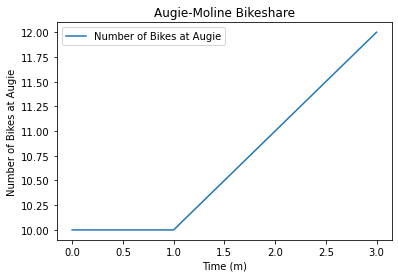

In [35]:
results.plot(xlabel=results.index.name, ylabel=results.name,
            title='Augie-Moline Bikeshare',
            legend=True);

The result should be a plot with time on the $x$-axis and the number of bikes on the $y$-axis.
Since we only ran three time steps, it might not be very interesting.

Technical point: The function `plot`, in addition to making the plot, *returns* the axes of the plot.  The semicolon (;) tells Jupyter not to print this returned value.  Just for fun, remove the semicolon and run the cell again, and see what happens.

## Summary

This chapter introduces the tools we need to run simulations, record the results, and plot them.

We used a `Series` object to represent the state of the system.
We used the `flip` function and an `if` statement to simulate a single time step.
We used a `for` loop to simulate a series of steps, and another `Series` to record the results.
Finally, we used `plot` to plot the results.  That's a lot of stuff!  

In the next chapter, we'll start to work on the simulation in order to make it a little more realistic.

## Exercises

Before you go on, you might want to work on the following exercises.

### Exercise 1

What happens if you spell the name of a state variable wrong?  Edit the following cell, change the spelling of `moline`, and run it.

The error message uses the word *attribute*, which is another name for what we are calling a state variable. 

In [36]:
bikeshare = pd.Series(dict(augie=10,moline=2),name="Number of Bikes")

bikeshare.moline

2

### Exercise 2

Make a state object, but this time add a third state variable in addition to `augie` and `moline`.  Call the third variable `rock_island`, with initial value 0, and display the state of the system.

In [37]:
# Solution goes here
bikeshare = pd.Series(dict(augie=10,moline=2,rock_island=0),name="Number of Bikes")
pd.DataFrame(bikeshare)

,Number of Bikes
augie,10
moline,2
rock_island,0


### Exercise 3

Wrap the code in the chapter in a function named `run_simulation` that takes three parameters, named `p1`, `p2`, and `num_steps`.

It should:

1. Create a `Series` object to hold the results.

2. Use a for loop to run `change_func` the number of times specified by `num_steps`, passing along the specified values of `p1` and `p2`.

3. After each step, it should save the number of bikes at augie in the `Series`.

4. After the for loop, it should plot the results.

To test your function:

1. Create a state `Series` with the initial state of the system.

2. Call `run_simulation` with parameters `p1=0.3`, `p2=0.2`, and `num_steps=60`.

This is challenging, but most of this code is in the chapter above.  Take advantage of cut-and-paste!

In [38]:
# Define the function
def run_simulation(p1,p2,num_steps):
    results = pd.Series([],dtype=object)
    results.name = 'Number of Bikes at Augie'
    results.index.name = 'Time Step'
    results[0] = bikeshare.augie
    
    for i in range(num_steps):
        change_func(p1,p2)
        results[i+1] = bikeshare.augie
    results.plot(xlabel=results.index.name, ylabel=results.name,
            title='Augie-Moline Bikeshare',
            legend=True);
        

Moving a bike to Augustana
Moving a bike to Moline
Moving a bike to Augustana
Moving a bike to Moline
Moving a bike to Augustana
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Augustana
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Augustana
Moving a bike to Moline
Moving a bike to Augustana
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Augustana
Moving a bike to Moline
Moving a bike to Augustana
Moving a bike to Moline
Moving a bike to Augustana
Moving a bike to Augustana
Moving a bike to Moline
Moving a bike to Augustana
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Moline
Moving a bike to Moline


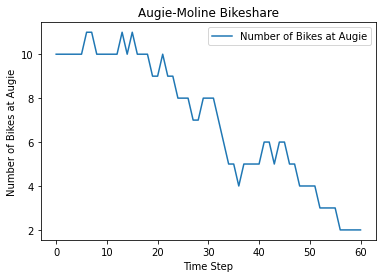

In [39]:
# Test the function with the given values
bikeshare = pd.Series(dict(augie=10,moline=2),name="Number of Bikes")
run_simulation(0.3,0.2,60)

### Exercise 4

In the next chapter, we'll look for ways that we can improve this model.  In preparation, take a moment and try to list 3 aspects of a realistic bikeshare system that this model does not take into account.   Choose one of the aspects that you think might make the biggest difference, and suggest in a couple sentences how you might incorporate that aspect into the model (not in terms of code--just in terms of process).  

Put your answer in a Markdown cell below this one. 


## Under the Hood

This section contains additional information about the functions we've used and pointers to their documentation.

You don't need to know anything in this section, so if you are already feeling overwhelmed, you might want to skip it.
But if you are curious, read on.

### Series objects

The `Series` object defined by the Pandas library.  The documentation is at <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html>.

`Series` objects provide their own `plot` function, which is why we call it like this:

```
results.plot()
```

Instead of like this:

```
plot(results)
```

So what makes a `Series` a `Series`?  It is essentially a two-columned table.  The first column is the `index`, and the second column is a variable.  So in the `results` series that we used, the index was the number of minutes that have passed.  In `bikeshare` series, the index is the names of the state variables.  It's easier to understand this by seeing it, so run the following two cells:

In [40]:
# Display a bikeshare, which is a state object that is a Series
pd.DataFrame(bikeshare)

,Number of Bikes
augie,2
moline,10


In [41]:
# Display a results, which is also a Series
pd.DataFrame(results)

,Number of Bikes at Augie
Time (m),
0,10
1,10
2,11
3,12


Both Series are two-column tables.  The variable has different names in each (`Number of Bikes` vs `Number of Bikes at Augie`), and the index of labels is different (variable names vs. `time`).  But the format of both tables is the same. 

We'll use `Series` (and its big brother, `DataFrame`) often in this course.

### Flip

The `flip` function uses NumPy's `random` function to generate a random number between 0 and 1, then returns `True` or `False` with the given probability.

You can get the source code for `flip` (or any other function) by running the following cell.  You can also open the file called `modsim.py` in the `ModSimPy_Functions` folder to see any of the `modsimpy` functions.

In [42]:
source_code(flip)

def flip(p=0.5):
    """Flips a coin with the given probability.

    p: float 0-1

    returns: boolean (True or False)
    """
    return np.random.random() < p

